In [1]:
import gym
import w_mac
import numpy as np
from gym.spaces import Tuple, Discrete, Box, MultiDiscrete, MultiBinary
from collections import defaultdict
import networkx as nx
import random
from w_mac.envs.packet import Packet

defaultdict(<class 'list'>, {0: [2, 1, 3], 1: [2, 3], 2: [3, 4], 3: [4], 5: [2, 3, 4]})


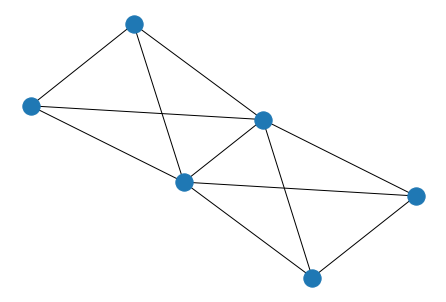

In [2]:
# data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
#data = [(0,1),(0,8),(0,7),(0,12),(0,2),(1,2),(1,12),(1,5),(1,6),(1,14),(1,7),(1,8),(5,6),(5,14),(6,14),(8,7),(12,2),(2,3),(2,4),(4,13),(4,9),(4,11),(4,10),(10,11),(9,13),(3,4),(9,10),(9,11),(5,15)]
d = defaultdict(list)
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw(G)

In [3]:
G.has_edge(0,5)

False

In [5]:
env = gym.make('wmac-graph-v0',graph=G)
env.reset()

Intermediate nodes 2
Intermediate nodes 3
self.collision_domain {1: [0, 1, 2, 3], 5: [2, 3, 4, 5]}
self.node_in_domains :  {0: [1], 1: [1], 2: [1, 5], 3: [1, 5], 4: [5], 5: [5]}
lower_bound [0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0] higher_bound [3, 3, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1]
Box(12,)
[0 1 1 0 5 5 1 1 1 1 1 1]
MultiDiscrete([7 7 7 7 7 7 2 2 2 2 2 2])
[1 1 2 5 3 3 0 1 0 1 1 0]
src:  0 dest:  4
src:  0 dest:  4
src:  2 dest:  1
src:  2 dest:  5
src:  1 dest:  3
src:  1 dest:  3
src:  3 dest:  2
src:  3 dest:  2
src:  4 dest:  5
src:  4 dest:  3
src:  5 dest:  5
src:  5 dest:  0
src:  0 dest:  0
src:  0 dest:  2
src:  2 dest:  3
src:  2 dest:  4
src:  1 dest:  0
src:  1 dest:  4
src:  3 dest:  4
src:  3 dest:  5
src:  4 dest:  5
src:  4 dest:  0
src:  5 dest:  4
src:  5 dest:  4
[0, 3, 0, 4, 5, 4, 0, 0, 1, 0, 0, 0]


array([0, 3, 0, 4, 5, 4, 0, 0, 1, 0, 0, 0])

In [6]:
actions= env.action_space.sample()
actions

array([3, 2, 5, 5, 4, 2, 0, 0, 0, 0, 1, 0], dtype=int32)

In [7]:
nxt_state, reward, done, _ = env.step(actions)
print(nxt_state, reward, done, _ )

received action [3 2 5 5 4 2 0 0 0 0 1 0]
nxt_hop_list:  [3, 2, 5, 5, 4, 2]
tw_status_list [0, 0, 0, 0, 1, 0]
node  4  transmission SUCCESS
Adding packet to the queue of  4
final reward -3900
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [0 3 0 4 0 4 0 0 1 0 0 0] -3900 False
[0 3 0 4 0 4 0 0 1 0 0 0] -3900 False {}


In [8]:
env.action_space.nvec[0]

AttributeError: 'Box' object has no attribute 'nvec'

In [ ]:
actions = [1,0,1,0,1]
collision_domain  = {0:[0,1,2],1:[2,3,4]}

p1_src = 0
p4_src = 4 

p1_nh = 2
p4_nh = 2 

for id, action in enumerate(actions):
      for key,values in collision_domain.items():
        if(id in values):
            action_sublist = [actions[i] for i in values]
            #print("a_sublist", action_sublist)
            if(action_sublist.count(1) > 1):
                print("collision")
                break
            else:
                print("sucess")
                break
    

In [ ]:
wait_counter = [4,2,3,1,0]
actions = [0,1,0,1,0]
reward = 0
for id,count_val in enumerate(wait_counter):
    print(id, count_val)
    if count_val < 4 and actions[id] != 1 :
        print("id",id)
        reward -= 500
print(reward)        

In [ ]:
from gym.spaces import Box


B = Box(low=0.0, high=1.0, shape=(2, 3), dtype=np.float32)
B.sample()

In [ ]:
c =  MultiDiscrete([ (5,5,5,5,5), (2,2,2,2,2) ])
c.sample()

In [ ]:
t = Tuple((Discrete(6),Discrete(6),Box(0, 1, shape=(1, 5))))
t.sample()

In [ ]:
#e = Tuple((MultiDiscrete([ (5,5,5,5,5), (2,2,2,2,2) ]),Box(0, 1, shape=(1, 5))))
#e.sample()

In [ ]:
num_nodes = 5
tup1 = tuple((num_nodes,)*num_nodes)
tup2 = tuple((2,)*num_nodes)
l1 = []
l1.append(tup1)
l1.append(tup2)
l1

In [ ]:
m1 = MultiDiscrete(l1)
m1.sample()

In [ ]:
queues = {i: [] for i in env.graph.nodes(data=False)}
print(queues)

for i in env.graph.nodes(data=False):
    #Assumption : same destination for all the queued packets in the node
    src = i
    dest = random.randrange(1,5)
    while (False == (env.graph.has_edge(src,dest))):
        dest = random.randrange(1,5)
    print(src,dest)

    for count in range(2):
        # create packet and register process
        packet = Packet(src,dest,dest) #for now consider single hop. Hence dest = nxt_hop
        queues[src].insert(0, packet)

# Print the number of elements in queue.
#print(len(queues[1]))

n3_queue = queues[3]
n3_first_packet = n3_queue[len(n3_queue)-1]
print('n3_nxt_hop', n3_first_packet.nxt_hop)

#Frame the state - Next hop of all first packets in queue.

state = [] #empty list for state

for node in queues.values():
    if len(node):
        print(node[len(node)-1].id)
        state.append(node[len(node)-1].nxt_hop)
    #for packet in node:
    while (len(node)):
        packet = node.pop()
        print('id :',packet.id)
        print('src :',packet.src)
        print('dest :',packet.dest)
        print('nxt_hop :',packet.nxt_hop)
        print('------------------------')
    
    print(state)
